In [1]:
import sys
print(sys.executable)
import pandas as pd
print(pd.__version__)


c:\Python314\python.exe
2.3.3


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned data
df = pd.read_csv('Cleaned_Amazon_Sale_Report.csv')

# Verify data types
print("Data Types:")
print(df.dtypes)

# Convert Date to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Ensure Amount is numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Basic statistics
print("Dataset Overview:")
print(df.info()) 
print("Statistical Summary:")
print(df.describe())

Data Types:
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code        int64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Year                    int64
Month                   int64
MonthName              object
Day                     int64
dtype: object


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128969 entries, 0 to 128968
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype         
---  -

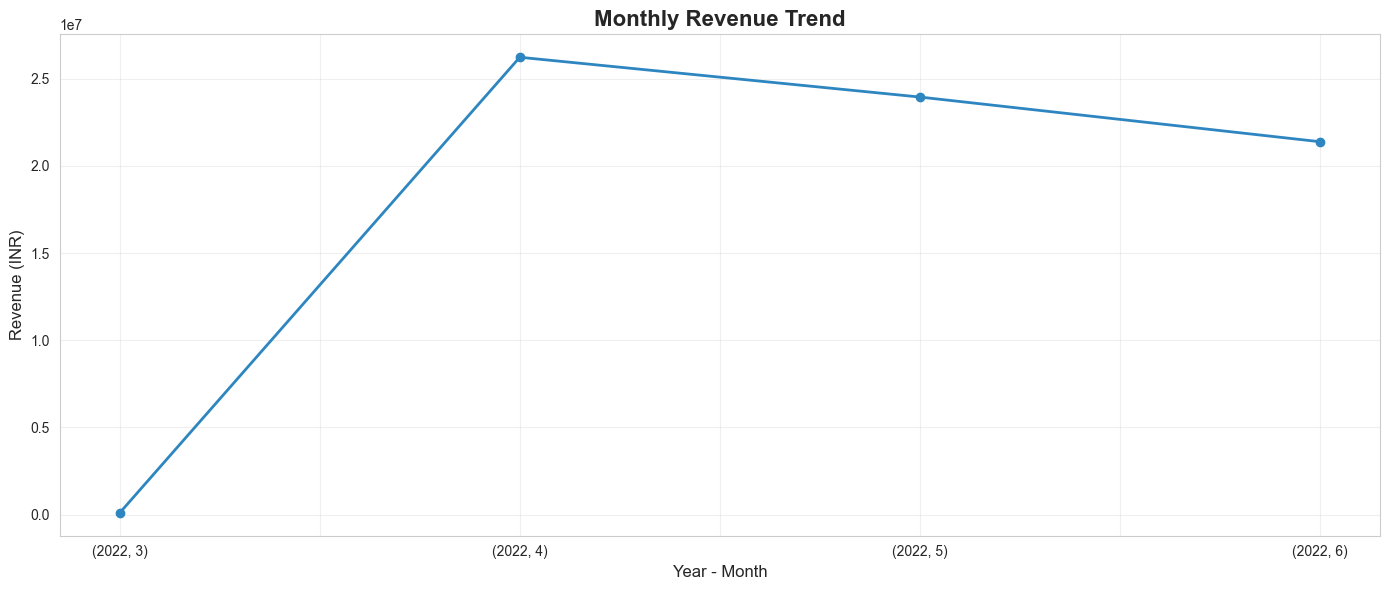

In [3]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
 
# CHART 1: Monthly Revenue Trend 
plt.figure(figsize=(14, 6))
monthly_rev_plot = df.groupby(['Year', 'Month'])['Amount'].sum()
monthly_rev_plot.plot(kind='line', marker='o', color='#2E86C1', linewidth=2)
plt.title('Monthly Revenue Trend', fontsize=16, fontweight='bold')
plt.xlabel('Year - Month', fontsize=12)
plt.ylabel('Revenue (INR)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('monthly_revenue_trend.png', dpi=300)
plt.show()


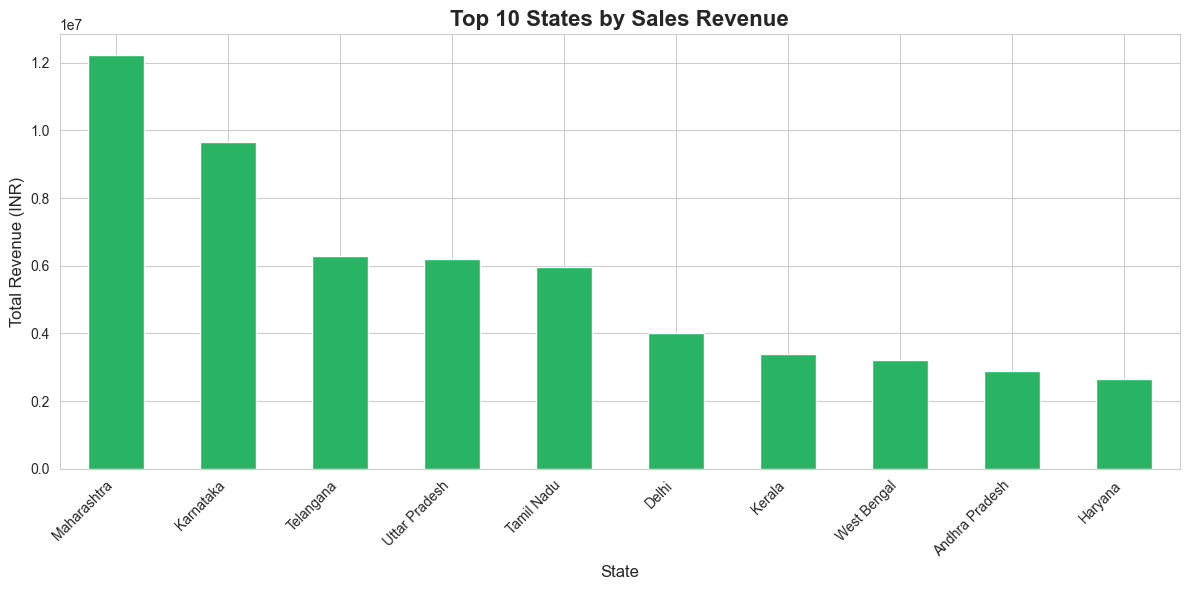

In [4]:
 
# CHART 2: Top 10 States by Sales 
plt.figure(figsize=(12, 6))
top_states = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', color='#28B463')
plt.title('Top 10 States by Sales Revenue', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Revenue (INR)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_states_sales.png', dpi=300)
plt.show()

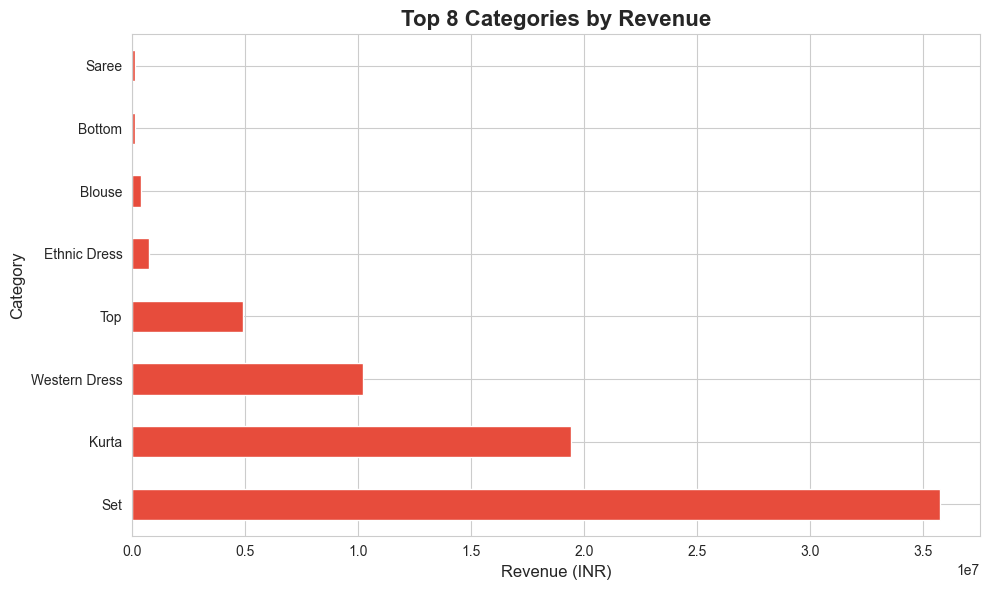

In [5]:
 
# CHART 3: Sales by Category 
plt.figure(figsize=(10, 6))
category_revenue = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(8)
category_revenue.plot(kind='barh', color='#E74C3C')
plt.title('Top 8 Categories by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Revenue (INR)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.savefig('category_sales.png', dpi=300)
plt.show()


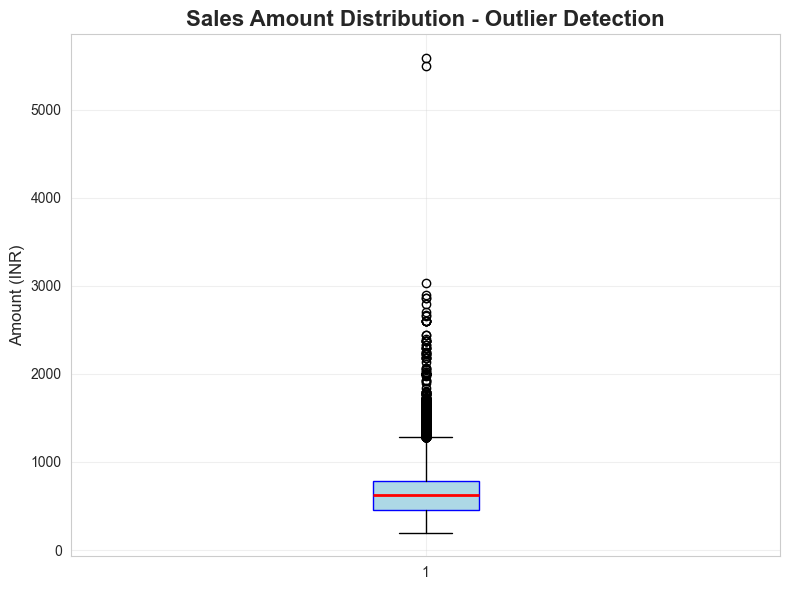

In [6]:
 
# CHART 4: Outlier Detection - Boxplot 
plt.figure(figsize=(8, 6))
df_positive = df[df['Amount'] > 0]  # Only positive amounts
plt.boxplot(df_positive['Amount'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Sales Amount Distribution - Outlier Detection', fontsize=16, fontweight='bold')
plt.ylabel('Amount (INR)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outlier_boxplot.png', dpi=300)
plt.show()

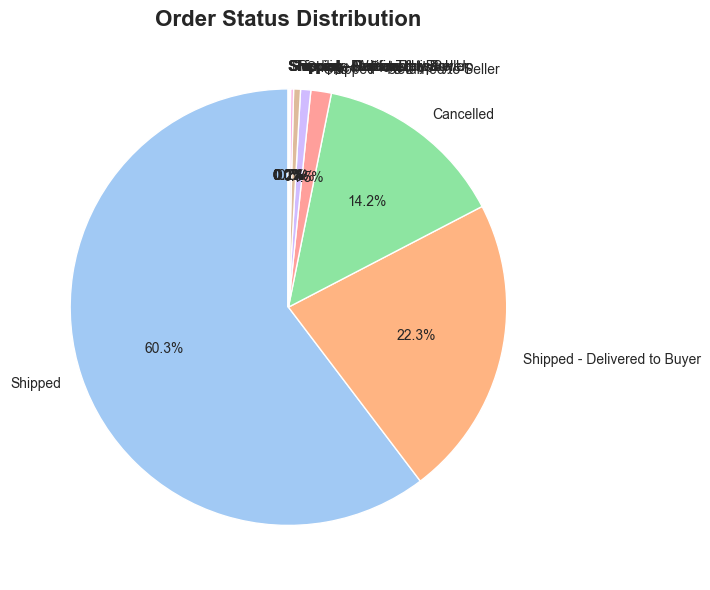

In [7]:
 # CHART 5: Order Status Distribution
plt.figure(figsize=(10, 6))
status_counts = df['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Order Status Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('order_status_distribution.png', dpi=300)
plt.show()


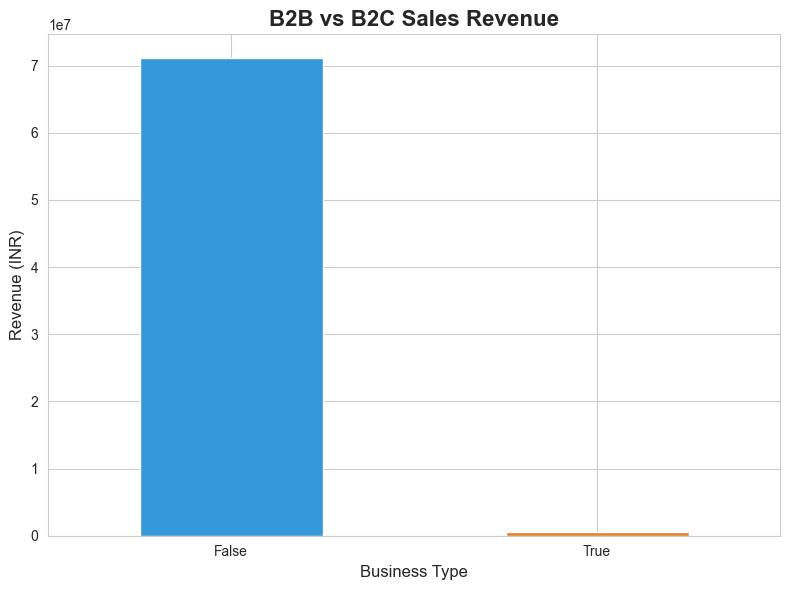

In [8]:
 
# CHART 6: B2B vs B2C Sales 
plt.figure(figsize=(8, 6))
b2b_revenue = df.groupby('B2B')['Amount'].sum()
b2b_revenue.plot(kind='bar', color=['#3498DB', '#E67E22'])
plt.title('B2B vs B2C Sales Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Business Type', fontsize=12)
plt.ylabel('Revenue (INR)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('b2b_vs_b2c.png', dpi=300)
plt.show()